In [12]:
import numpy as np 
import pandas as pd 
import os
#import cv2
import warnings
import datetime
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import Model 
from sklearn.metrics import confusion_matrix # Confusion matrix for model evaluation 
from tensorflow.keras.models import Sequential # Sequential model initialization
from sklearn.model_selection import train_test_split  # function to split sample data to train and test
from tensorflow.keras.optimizers import Adam, Nadam, Ftrl # Optimizer algorithms
from tensorflow.keras.metrics import categorical_crossentropy  # Loss functions
from tensorflow.keras.preprocessing.image import ImageDataGenerator 
from tensorflow.keras import layers
from keras.regularizers import l2, l1
import visualkeras
from __future__ import absolute_import, division, print_function, unicode_literals
import tensorflow as tf
from tensorflow.keras import datasets
import numpy as np
from matplotlib import pyplot
warnings.filterwarnings('ignore')

In [13]:
class_names = os.listdir('data-set\\skin-cancer\\data\\train')
class_types = len(os.listdir('data-set\\skin-cancer\\data\\train'))
print('Number of classes for Classification: ',class_types)
print(f'The class names are {class_names[0]} and {class_names[1]}')
print('--> Count of Train Images <--')
for i in class_names:
    print(i + ':' + str(len(os.listdir('data-set\\skin-cancer\\data\\train\\'+i))))
print('--> Count of Test Images <--')
for i in class_names:
    print(i + ':' + str(len(os.listdir('data-set\\skin-cancer\\data\\test\\'+i))))

Number of classes for Classification:  2
The class names are benign and malignant
--> Count of Train Images <--
benign:1440
malignant:1197
--> Count of Test Images <--
benign:360
malignant:300


In [15]:
train_datagen = ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        'data-set\\skin-cancer\\data\\train',
        target_size=(224,224),
        batch_size=32,
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        'data-set\\skin-cancer\\data\\test',
        target_size=(224,224),
        batch_size=8,
        class_mode='binary')

Found 2637 images belonging to 2 classes.
Found 660 images belonging to 2 classes.


In [17]:
for image_batch, labels_batch in train_generator:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 224, 224, 3)
(32,)


In [18]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(224,224,3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [19]:
from tensorflow.keras.optimizers import RMSprop
model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=1e-4),
              metrics=['accuracy'])

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 93312)             0         
                                                                 
 dense (Dense)               (None, 256)               2

In [21]:
epochs=10
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)
history = model.fit(
  train_generator,
  validation_data=validation_generator,
  epochs=epochs,
    callbacks=[tensorboard_callback]
)

Epoch 1/10
83/83 [==============================] - 102s 1s/step - loss: 0.7450 - accuracy: 0.6033 - val_loss: 0.5736 - val_accuracy: 0.6667
Epoch 2/10
83/83 [==============================] - 121s 1s/step - loss: 0.5057 - accuracy: 0.7418 - val_loss: 0.5557 - val_accuracy: 0.7364
Epoch 3/10
83/83 [==============================] - 89s 1s/step - loss: 0.4602 - accuracy: 0.7759 - val_loss: 0.3999 - val_accuracy: 0.8030
Epoch 4/10
83/83 [==============================] - 83s 994ms/step - loss: 0.4308 - accuracy: 0.7873 - val_loss: 0.4352 - val_accuracy: 0.7742
Epoch 5/10
83/83 [==============================] - 83s 996ms/step - loss: 0.4132 - accuracy: 0.7952 - val_loss: 0.3837 - val_accuracy: 0.8288
Epoch 6/10
83/83 [==============================] - 83s 997ms/step - loss: 0.3979 - accuracy: 0.8020 - val_loss: 0.4500 - val_accuracy: 0.7545
Epoch 7/10
83/83 [==============================] - 83s 995ms/step - loss: 0.3934 - accuracy: 0.8134 - val_loss: 0.3817 - val_accuracy: 0.8212
Epoch 

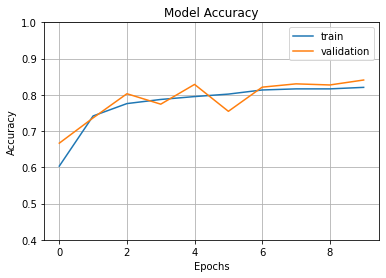

In [22]:
fig1 = plt.gcf()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.axis(ymin=0.4,ymax=1)
plt.grid()
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()


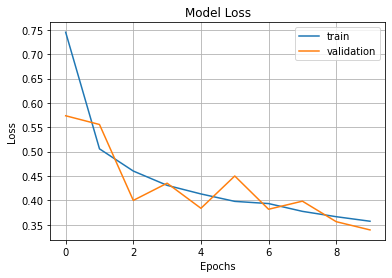

In [23]:
fig1 = plt.gcf()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.grid()
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()
fig1.savefig('loss_plot.jpg')

In [24]:
#SIZE CHANGE
batch_size = 32
img_height = 180
img_width = 180

In [25]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
 'data-set\\skin-cancer\\data\\train',
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 2637 files belonging to 2 classes.
Using 2110 files for training.


In [26]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  'data-set\\skin-cancer\\data\\test',
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 660 files belonging to 2 classes.
Using 132 files for validation.


In [27]:
class_names = train_ds.class_names
print(class_names)


['benign', 'malignant']


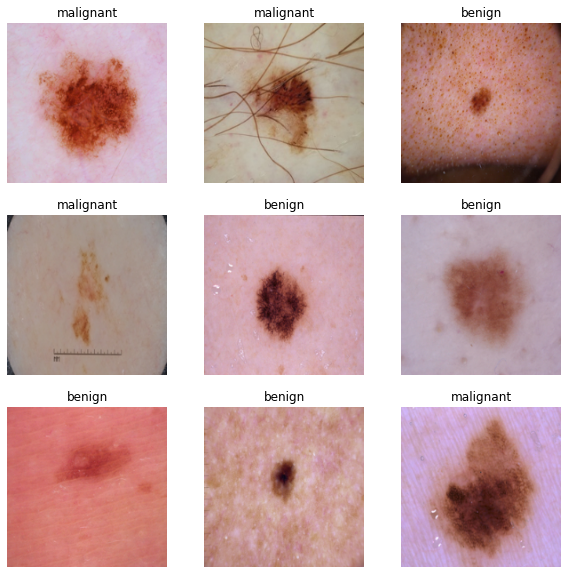

In [28]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [29]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 180, 180, 3)
(32,)


In [30]:
normalization_layer = layers.experimental.preprocessing.Rescaling(1./255)

In [31]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixels values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))


0.037569873 0.7776294


In [32]:
num_classes = 2

model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [33]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


In [38]:
#tf.keras.utils.plot_model(model,to_file='model.png', show_shapes=True)
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_2 (Conv2D)           (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 90, 90, 16)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 45, 45, 64)       

In [39]:
import visualkeras
visualkeras.layered_view(model).show() 
visualkeras.layered_view(model, to_file='output.png')
visualkeras.layered_view(model, to_file='output.png',spacing=50).show() 

In [40]:
import visualkeras
visualkeras.layered_view(model).show() 
visualkeras.layered_view(model, to_file='output.png')
visualkeras.layered_view(model, to_file='output.png',spacing=50).show() 

In [41]:
es = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', restore_best_weights=True,patience=5)
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)
epochs=15
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs,
    callbacks=[tensorboard_callback]
)


Epoch 1/15
66/66 [==============================] - 38s 560ms/step - loss: 0.5537 - accuracy: 0.7227 - val_loss: 0.4252 - val_accuracy: 0.7652
Epoch 2/15
66/66 [==============================] - 36s 543ms/step - loss: 0.4232 - accuracy: 0.7787 - val_loss: 0.4317 - val_accuracy: 0.7727
Epoch 3/15
66/66 [==============================] - 35s 532ms/step - loss: 0.3849 - accuracy: 0.8128 - val_loss: 0.5022 - val_accuracy: 0.8182
Epoch 4/15
66/66 [==============================] - 35s 520ms/step - loss: 0.3988 - accuracy: 0.8137 - val_loss: 0.4257 - val_accuracy: 0.8106
Epoch 5/15
66/66 [==============================] - 55s 834ms/step - loss: 0.3497 - accuracy: 0.8313 - val_loss: 0.4324 - val_accuracy: 0.7652
Epoch 6/15
66/66 [==============================] - 37s 555ms/step - loss: 0.3074 - accuracy: 0.8517 - val_loss: 0.4497 - val_accuracy: 0.7727
Epoch 7/15
66/66 [==============================] - 36s 543ms/step - loss: 0.2984 - accuracy: 0.8569 - val_loss: 0.4467 - val_accuracy: 0.8106

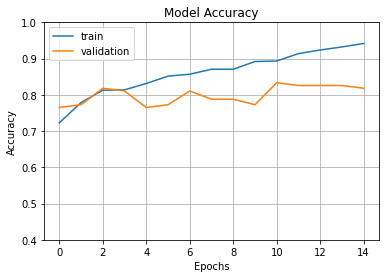

In [42]:
fig1 = plt.gcf()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.axis(ymin=0.4,ymax=1)
plt.grid()
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

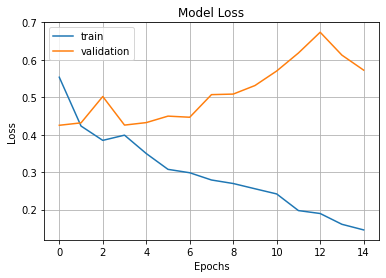

In [43]:
fig1 = plt.gcf()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.grid()
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')

plt.legend(['train', 'validation'])
plt.show()
fig1.savefig('loss_plot.jpg')

In [44]:
#AUGMENTATION
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal", 
                                                 input_shape=(img_height, 
                                                              img_width,
                                                              3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

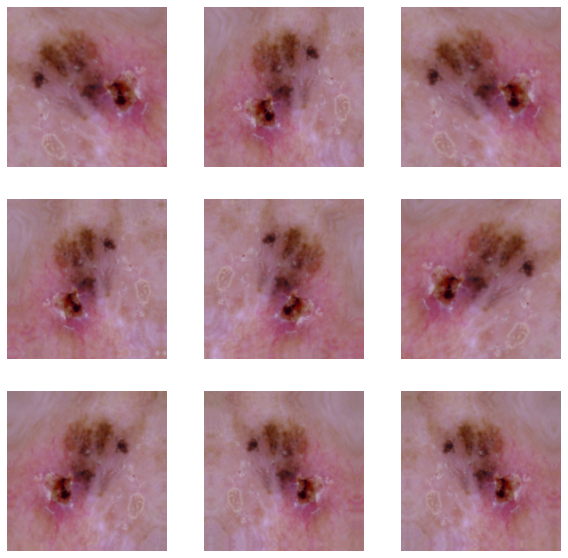

In [45]:
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")


In [46]:
num_classes = 2

model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [47]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


In [48]:
model.summary()


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_2 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_5 (Conv2D)           (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 90, 90, 16)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 45, 45, 64)       

In [49]:
es = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', restore_best_weights=True,patience=5)
epochs=15
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs,
    callbacks=[tensorboard_callback]
)

Epoch 1/15
66/66 [==============================] - 46s 692ms/step - loss: 0.6766 - accuracy: 0.6081 - val_loss: 0.7059 - val_accuracy: 0.5909
Epoch 2/15
66/66 [==============================] - 45s 680ms/step - loss: 0.5116 - accuracy: 0.7389 - val_loss: 0.4555 - val_accuracy: 0.7500
Epoch 3/15
66/66 [==============================] - 45s 670ms/step - loss: 0.4350 - accuracy: 0.7758 - val_loss: 0.4702 - val_accuracy: 0.7652
Epoch 4/15
66/66 [==============================] - 45s 682ms/step - loss: 0.3915 - accuracy: 0.8095 - val_loss: 0.4045 - val_accuracy: 0.7879
Epoch 5/15
66/66 [==============================] - 44s 660ms/step - loss: 0.3689 - accuracy: 0.8114 - val_loss: 0.4456 - val_accuracy: 0.7803
Epoch 6/15
66/66 [==============================] - 43s 650ms/step - loss: 0.3532 - accuracy: 0.8251 - val_loss: 0.4105 - val_accuracy: 0.7955
Epoch 7/15
66/66 [==============================] - 43s 652ms/step - loss: 0.3274 - accuracy: 0.8322 - val_loss: 0.3933 - val_accuracy: 0.7576

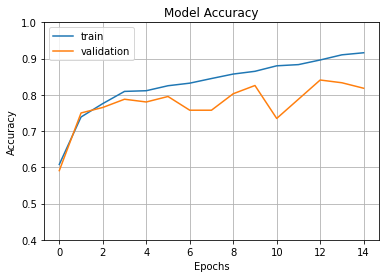

In [50]:
fig1 = plt.gcf()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.axis(ymin=0.4,ymax=1)
plt.grid()
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()


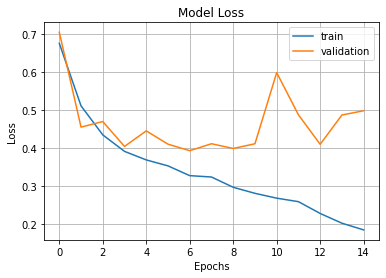

In [51]:
fig1 = plt.gcf()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.grid()
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')

plt.legend(['train', 'validation'])
plt.show()
fig1.savefig('loss_plot.jpg')

In [52]:
#CUTMIX
from __future__ import absolute_import, division, print_function, unicode_literals
import tensorflow as tf
from tensorflow.keras import datasets
import numpy as np
from matplotlib import pyplot

beta = 0.5
cutmix_prob = 1.0
num_classes = 100
batch_size = 6
r = 0.7 # fixed for cutmix display

def train_augment(image,label):
  image = tf.image.resize_with_crop_or_pad(image, 36, 36) 
  image = tf.image.random_crop(image, size=[20,32, 32, 3]) 
  image = tf.image.random_flip_left_right(image)
  image = tf.cast(image, dtype=tf.float32)
  label = tf.cast(label, dtype=tf.float32)
  return image,label

def rand_bbox(size, lam):

    W = size[1] 
    H = size[2]
    cut_rat = np.sqrt(1. - lam)
    cut_w = np.int(W * cut_rat)
    cut_h = np.int(H * cut_rat)

    # uniform
    cx = np.random.randint(W)
    cy = np.random.randint(H)
    
    bbx1 = np.clip(cx - cut_w // 2, 0, W)
    bby1 = np.clip(cy - cut_h // 2, 0, H)
    bbx2 = np.clip(cx + cut_w // 2, 0, W)
    bby2 = np.clip(cy + cut_h // 2, 0, H)

    return bbx1, bby1, bbx2, bby2

In [53]:
train_dataset = train_ds .map(train_augment)
train_dataset = train_ds .batch(batch_size)
train_dataset = train_ds .shuffle(512)

In [54]:
# cutmix
for image, target in train_dataset:       
  if beta > 0 and r < cutmix_prob:
      lam = np.random.beta(beta, beta)
      rand_index = tf.random.shuffle(tf.range(len(target)))
      target_a = target
      target_b = tf.gather(target, rand_index)
      bbx1, bby1, bbx2, bby2 = rand_bbox(image.shape, lam)       
      image_a = image
      image_b = tf.gather(image, rand_index)
      mask = np.ones_like(image)
      mask[:, bbx1:bbx2, bby1:bby2, :] = 0          
      image_cutmix = tf.math.multiply(image_a,mask) + tf.math.multiply(image_b, (abs(1.-mask)))  
  break

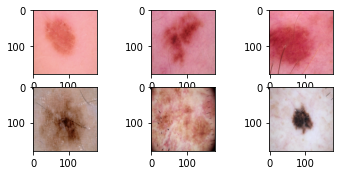

In [55]:
# Original images
from matplotlib import pyplot
for i in range(batch_size):
	pyplot.subplot(330 + 1 + i)
	pyplot.imshow(image[i]/255.)
pyplot.show()

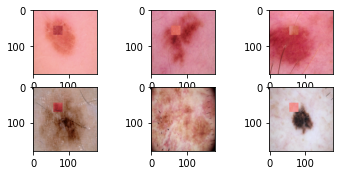

In [56]:
# Cutmix images
from matplotlib import pyplot
for i in range(batch_size):
	pyplot.subplot(330 + 1 + i)
	pyplot.imshow(image_cutmix[i]/255.)
pyplot.show()
